In [120]:
## I LOAD THE LIBRARIES I NEED FIRST

In [121]:
import numpy as np

In [122]:
import pandas as pd

In [123]:
## I load the sklearn libraries I need

In [124]:
from sklearn.tree import DecisionTreeClassifier         

In [125]:
from sklearn.model_selection import train_test_split  

In [126]:
from sklearn import metrics    #The metrics module will be used for accuracy calculation

In [127]:
##I load the truck data set created

In [128]:
data = pd.read_csv("truck_data_set.csv")

In [164]:
data.head(10)   #The truck data set contains 100 rows but I will only be showing 10

,Size(feet),Distance_to_be_covered(Km),Break_Speed(s),Energy_Consumption(Wh/km),Sensors,Leading_Truck
0,5,106,5.623918,18.281209,3,1
1,5,106,9.827878,10.421941,4,1
2,9,106,2.521908,15.182424,4,1
3,5,73,7.583266,17.235860,3,0
4,13,79,3.690564,18.203863,4,0
5,10,78,8.625175,18.171903,4,0
6,5,82,5.575008,15.695527,4,0
7,7,67,6.269744,11.635165,1,1
8,6,57,1.952281,19.906511,2,1
9,13,106,1.550186,13.364626,4,1


In [130]:
##I seprate the colums into two: feature variables and target variables

In [131]:
##I create a list of the features that are in the columns

In [132]:
features = ["Size(feet)","Distance_to_be_covered(Km)","Break_Speed(s)","Energy_Consumption(Wh/km)","Sensors"]

In [133]:
X = data[features]

In [134]:
## I only have one target: Leading_Truck. So there is no need to create a list for that,

In [135]:
##I just reference it explicitly

In [136]:
y = data.Leading_Truck

In [137]:
##The next step is to divide the data set into traning and test.

In [138]:
##It is by convention that 70% of the data set is used for training and 30% for test

In [139]:
##I will be using the train_test_split() function I imported from the sklearn.model_selection module

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1) #It is by convention random is 1

**Building the Decison Tree**

In [141]:
##I first create the decision tree classifier object with the help of the DecisionTreeClassifier

In [142]:
##class imported from the sklearn.tree module

In [143]:
DT = DecisionTreeClassifier()

In [144]:
##Then I train the decion tree classifier 

In [145]:
DT_train = DT.fit(X_train,y_train)

In [146]:
## I then predict the response for the test data set

In [147]:
y_predict = DT.predict(X_test)

In [148]:
print(y_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1]


In [149]:
#To estimate the accurcy of my model I compare predicted values to the actual value given in the

In [150]:
#data set.

In [151]:
#The "meterics" function that was imported will be used to calculate the accuracy of the model

In [152]:
# Remember I made mention of this while importing it above

In [153]:
model_accuracy = metrics.accuracy_score(y_test, y_predict)

In [154]:
print("The accuracy of the model is: " + str(model_accuracy*100) + "%")

The accuracy of the model is: 73.33333333333333%


# Viewing the decision tree

In [155]:
from sklearn.tree import export_graphviz

In [156]:
from six import StringIO

In [157]:
from IPython.display import Image

In [158]:
import pydotplus

In [159]:
dot_data = StringIO()

In [160]:
export_graphviz(DT_train, out_file=dot_data, filled=True, rounded=True, special_characters=True,
               feature_names=features, class_names=['0','1'])

In [161]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [162]:
graph.write_png("Leading_truck.png")

True

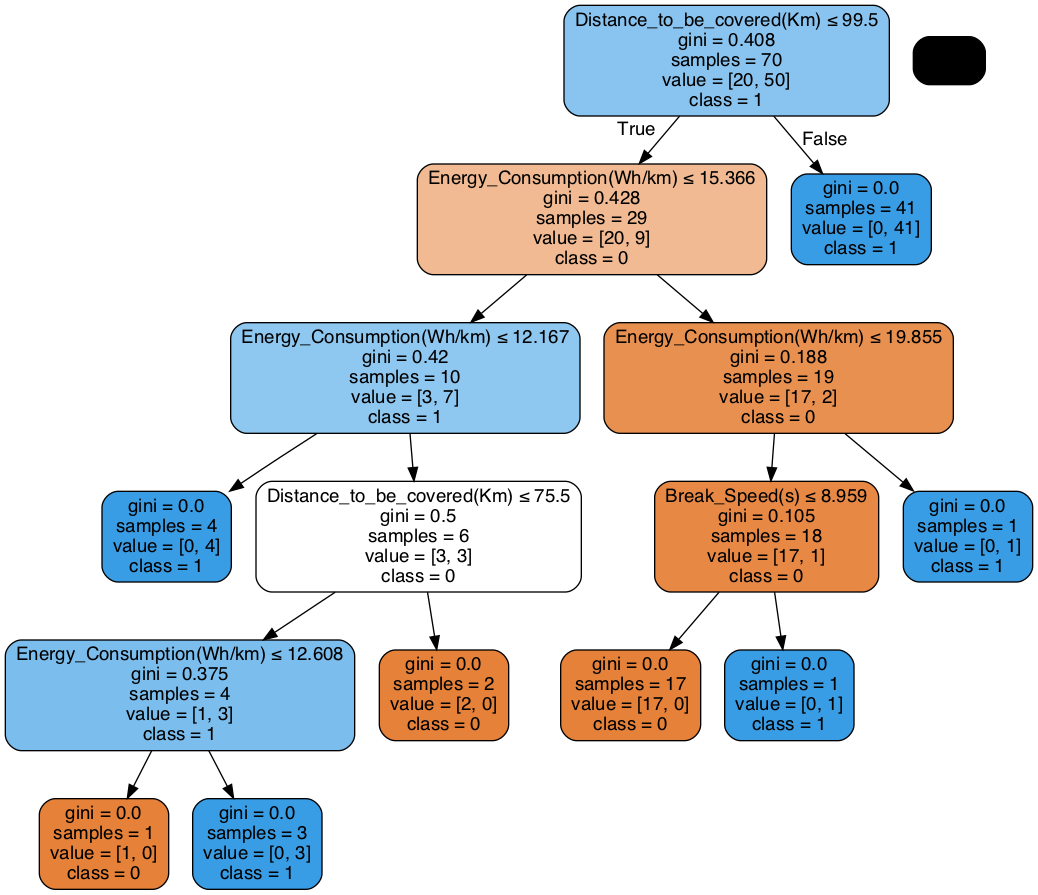

In [163]:
Image(graph.create_png())